In [1]:
using Revise
using QuantumCollocation
using NamedTrajectories
using LinearAlgebra
using SparseArrays
using Random; Random.seed!(1234);

Precompiling QuantumCollocation
  ✓ QuantumCollocation
  1 dependency successfully precompiled in 10 seconds. 329 already precompiled.


In [ ]:
sys = TransmonSystem(levels=4)

op = EmbeddedOperator(:X, sys)

T = 100
dt = 0.1

prob = UnitarySmoothPulseProblem(sys, op, T, dt; 
    leakage_suppression=false, 
    R_leakage=1.0e-1,
    a_bound=0.05
)

solve!(prob; max_iter=100)

println("fidelity = ", unitary_fidelity(prob, subspace=op.subspace_indices)^2)

applying constraint: initial value of Ũ⃗
applying constraint: initial value of a
applying constraint: final value of a
applying constraint: bounds on a
applying constraint: bounds on dda
applying constraint: bounds on Δt
applying constraint: time step all equal constraint

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.14.14, running with linear solver MUMPS 5.6.2.

Number of nonzeros in equality constraint Jacobian...:    52194
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:    22056

Total number of variables............................:     3864
           

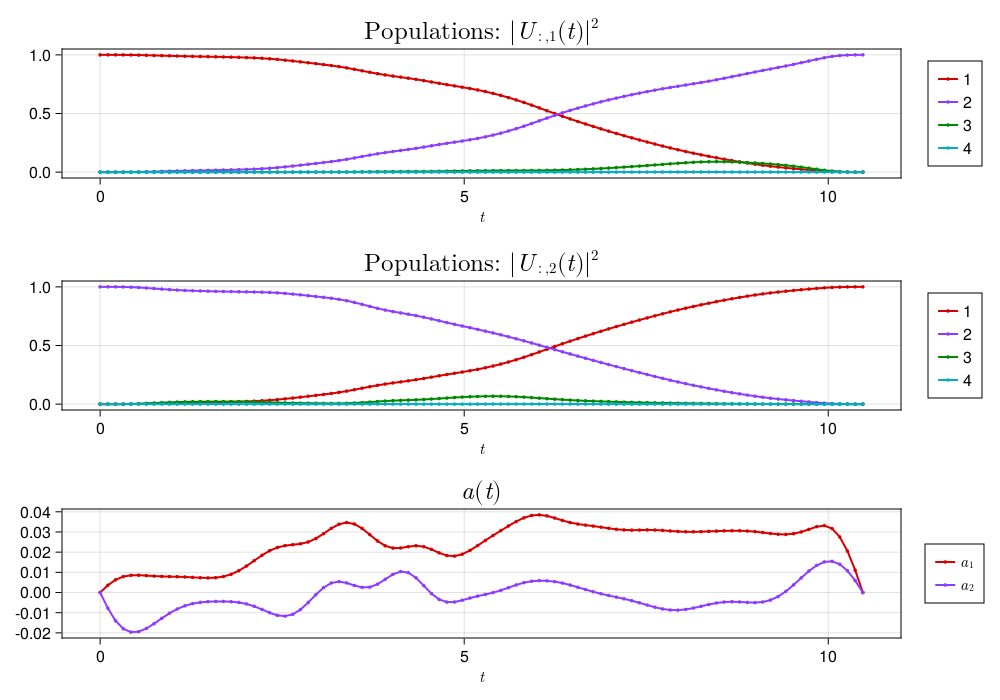

In [ ]:
plot_unitary_populations(prob.trajectory; unitary_columns=1:2, fig_size=(1000, 700))

fidelity = 0.8719754713487385


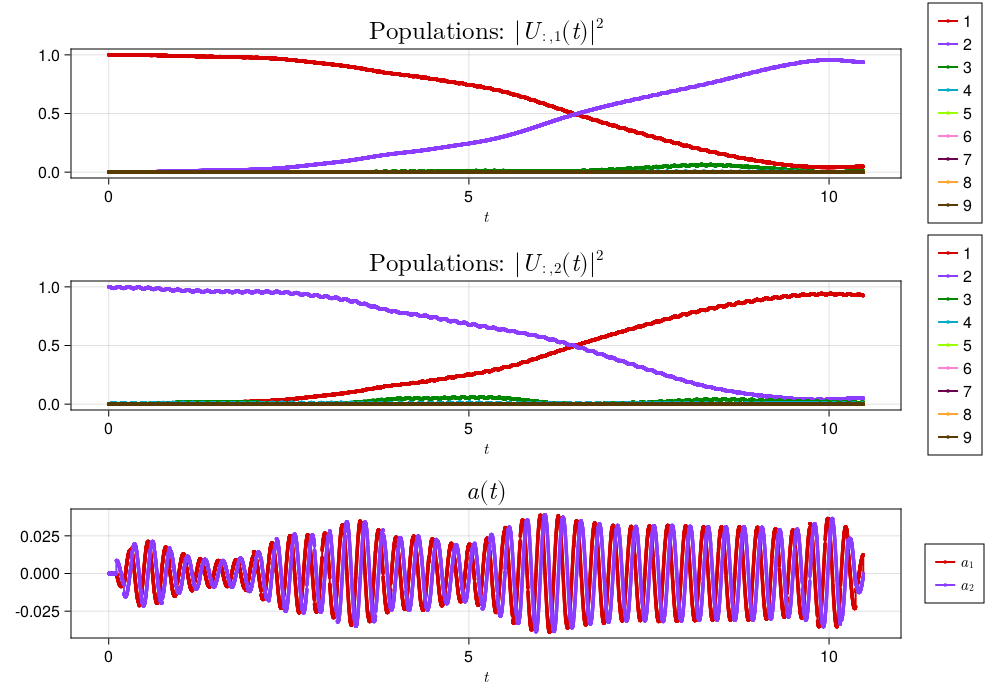

In [ ]:
sys_lab_frame = sys(levels=9, lab_frame=true, lab_frame_type=:cosine)

op_lab_frame = EmbeddedOperator(:X, sys_lab_frame)

traj_lab_frame = lab_frame_unitary_rollout_trajectory(sys_lab_frame, prob.trajectory)

F = unitary_fidelity(traj_lab_frame.Ũ⃗[:, end], traj_lab_frame.goal.Ũ⃗;
    subspace=op_lab_frame.subspace_indices
)
println("fidelity = ", F^2)

plot_unitary_populations(traj_lab_frame; fig_size=(1000, 700))